# Introduction to Machine Learning

As with anything, we'll start off with our usual imports.

In [1]:
import numpy as np
import pandas as pd

For ML, we'll be using a new package: `sci-kit learn`. It's one of the best in Python, and has all sorts of helpful functions for preparing the data, creating models, and evaluating accuracy.

If you don't have this yet installed, use `!pip install sklearn`

## Explore the data

Today we'll be taking a look at heart disease data. 

Every observation (row) is associated with a `target`, a binary indicator for whether or not the patient developed heart disease. The columns each represent some biological metric for that patient. 

In [2]:
url = 'https://raw.githubusercontent.com/ishaandey/node/master/week-6/workshop/heart.csv'
heart = pd.read_csv(url)

In [3]:
# Just some numerical conversions
heart['target'] = heart['target'].map({1:'heart disease', 0:'no heart disease'})
heart['sex'] = heart['sex'].map({1:'male',0:'female'})
heart['cp'] = heart['cp'].map({2: 'typical angina', 3: 'atypical angina', 1: 'non-anginal pain', 0: 'asymptomatic'})
heart['fbs'] = heart['fbs'].apply(lambda x: np.random.triangular(121, 145, 200) if x==1 else np.random.triangular(68, 100, 119)).astype(int)
heart['restecg'] = heart['restecg'].map({0:'normal', 1:'ST-T abnormality', 2:'left ventricular hypertrophy'})
heart['exang'] = heart['exang'].map({1:'angina', 0:'no angina'})
heart['slope'] = heart['slope'].map({0:'upsloping', 1:'flat', 2:'downsloping'})
heart['thal'] = heart['thal'].map({2:'no thalassemia', 1:'fixed defect', 3: 'reversable defect'})

In [4]:
heart.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
115,37,female,typical angina,120,215,101,ST-T abnormality,170,no angina,0.0,downsloping,0,no thalassemia,heart disease
244,56,male,asymptomatic,132,184,88,normal,105,angina,2.1,flat,1,fixed defect,no heart disease
236,58,male,asymptomatic,125,300,77,normal,171,no angina,0.0,downsloping,2,reversable defect,no heart disease
139,64,male,asymptomatic,128,263,101,ST-T abnormality,105,angina,0.2,flat,1,reversable defect,heart disease
179,57,male,asymptomatic,150,276,85,normal,112,angina,0.6,flat,1,fixed defect,no heart disease


Learning the context of which data was obtained is incredibly important. 
<br>Take a moment to look through the original study documentation: https://archive.ics.uci.edu/ml/datasets/heart+Disease

In groups, answer the following questions:

1. How many hospitals was this data pulled from? Around what year(s)?
2. What does the `chol` feature measure?
3. In this sample, what proportion of patients had the target condition? *(Use code for this)*
4. Lastly, **what type of ML problem is this**? (Supervised vs. Unsupervised? Classification vs. Regression?)

In [5]:
# Answers

## Preprocessing the data

Algorithms don't have the innate ability to translate English words into mathematical models. We've gotta do that work ourselves.

Overall, **our goal is to get *text* into *numbers* **. There's a couple strategies here:

#### Binary Indicator Variables

Indicator variables are always coded as `1` or `0`, usually corresponding to *condition present* `1` or *condition absent* `0` for that particular observation.

For example, heart disease can come in various forms of severity, BUT if we're just interested in **whether or not** the patient has some heart disease, we'll *binarize* that column.

In [6]:
heart['target'] = heart['target'].map({'heart disease':1, 'no heart disease':0})

Another common use case is with sex. Use the `.map()` function to code females as `1`, and males as `0`. 

In [7]:
# heart['sex'] = heart['sex'].map({'male':0,'female':1})

#### Binning into Intervals

Sometimes continuous variables can be better categorized as bins. In other words, we can break up the full range of numbers into chunks.

One good use of this would be with the fasting blood sugar, using the `pd.cut()` function. We can use the medical criteria of 120 mg/dl as a threshold for high blood sugar.

Continous feature


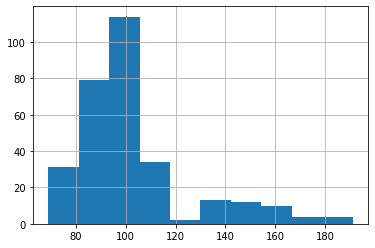

In [8]:
print('Continous feature')
heart.fbs.hist() # Show distribution of continuous numbers

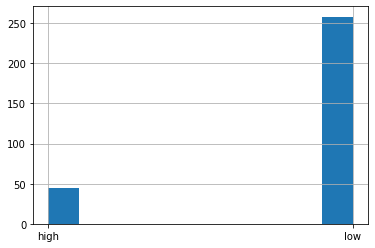

In [9]:
heart['fbs'] = pd.cut(heart['fbs'], [0, 120, 200], labels=['low','high'])
heart.fbs.hist()


#### Dummy Variables

Binarizing is great, but happens when we have more than 2 categories? 

The best way to handle this is to create *new unique column for every category*. 
<br>We can do this using Pandas' `get_dummies()` function.

In [10]:
# Quick helper
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style=\"display:inline\"'),raw=True)

In [11]:
display_side_by_side(heart[['cp']].head(5), pd.get_dummies(heart['cp'],prefix='cp').head(5))

cp 
 
 
 
 
 0 
 atypical angina 
 
 
 1 
 typical angina 
 
 
 2 
 non-anginal pain 
 
 
 3 
 non-anginal pain 
 
 
 4 
 asymptomatic 
 
 
 
 
 
 
 cp_asymptomatic 
 cp_atypical angina 
 cp_non-anginal pain 
 cp_typical angina 
 
 
 
 
 0 
 0 
 1 
 0 
 0 
 
 
 1 
 0 
 0 
 0 
 1 
 
 
 2 
 0 
 0 
 1 
 0 
 
 
 3 
 0 
 0 
 1 
 0 
 
 
 4 
 1 
 0 
 0 
 0

Because of some intricacies with the underlying linear algebra, we always drop one of the columns, and consider the others relative to it.

That way, if all three columns are `0`, we can assume the chest pain type was asymptomatic.

In [12]:
display_side_by_side(heart[['cp']].head(5), pd.get_dummies(heart['cp'],prefix='cp', drop_first=True).head(5))

cp 
 
 
 
 
 0 
 atypical angina 
 
 
 1 
 typical angina 
 
 
 2 
 non-anginal pain 
 
 
 3 
 non-anginal pain 
 
 
 4 
 asymptomatic 
 
 
 
 
 
 
 cp_atypical angina 
 cp_non-anginal pain 
 cp_typical angina 
 
 
 
 
 0 
 1 
 0 
 0 
 
 
 1 
 0 
 0 
 1 
 
 
 2 
 0 
 1 
 0 
 
 
 3 
 0 
 1 
 0 
 
 
 4 
 0 
 0 
 0

Instead of doing this on each categorical column, we can specify a list of features to do it on:

In [13]:
categ_cols = ['cp','restecg', 'thal', 'slope', 'exang', 'sex', 'fbs']
heart = pd.get_dummies(heart, columns=categ_cols, drop_first=True)
heart.head()

,age,trestbps,chol,thalach,oldpeak,ca,target,cp_atypical angina,cp_non-anginal pain,cp_typical angina,restecg_left ventricular hypertrophy,restecg_normal,thal_no thalassemia,thal_reversable defect,slope_flat,slope_upsloping,exang_no angina,sex_male,fbs_high
0,63,145,233,150,2.3,0,1,1,0,0,0,1,0,0,0,1,1,1,1
1,37,130,250,187,3.5,0,1,0,0,1,0,0,1,0,0,1,1,1,0
2,41,130,204,172,1.4,0,1,0,1,0,0,1,1,0,0,0,1,0,0
3,56,120,236,178,0.8,0,1,0,1,0,0,0,1,0,0,0,1,1,0
4,57,120,354,163,0.6,0,1,0,0,0,0,0,1,0,0,0,0,0,0


#### TLDR

This was a lot, I know. But it's incredibly important to understand the *rationale* behind each data transformation. 

In general, we want to convert text / information => numbers that can represent them. To do so, we can:

1. Binarize features
2. Bin based on intervals
3. Create dummy variables for columns with multiple categories

## Preparing data structures for the model

#### Step #1: Split the dataset into **feature and target variables**

Different fields use different names, but think of *feature* vars as your (multiple) independent variables, and *target* var as the singular dependent variable.

In [14]:
X = heart.drop(columns=['target'])
y = heart['target']

In [15]:
display_side_by_side(X.iloc[:5,:9],pd.DataFrame(y).head(5))

age 
 trestbps 
 chol 
 thalach 
 oldpeak 
 ca 
 cp_atypical angina 
 cp_non-anginal pain 
 cp_typical angina 
 
 
 
 
 0 
 63 
 145 
 233 
 150 
 2.3 
 0 
 1 
 0 
 0 
 
 
 1 
 37 
 130 
 250 
 187 
 3.5 
 0 
 0 
 0 
 1 
 
 
 2 
 41 
 130 
 204 
 172 
 1.4 
 0 
 0 
 1 
 0 
 
 
 3 
 56 
 120 
 236 
 178 
 0.8 
 0 
 0 
 1 
 0 
 
 
 4 
 57 
 120 
 354 
 163 
 0.6 
 0 
 0 
 0 
 0 
 
 
 
 
 
 
 target 
 
 
 
 
 0 
 1 
 
 
 1 
 1 
 
 
 2 
 1 
 
 
 3 
 1 
 
 
 4 
 1

#### Step #2: Split data into **training and testing data**

Why do we need to do this step? Think back to your SATs in high school. 
- When practicing for the exam, you were given practice tests that *resembled*, but weren't *exactly* the test you were about to take
- If you'd been given the *actual* exam to practice with, your score during the real thing wouldn't mean anything: <br>It *would not* have measured your abilities as a student, just your ability to memorize the particular answers for that particular exam.
<br>

The same goes with teaching a ML model some patterns in the data. 
- To allow the model to learn, we pass it *training data*. (Our SAT practice exams)
- To determine if the model really did learn, we'll feed in *testing data*. (The actual SAT exam)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

A few things here:
- The `train_test_split` function returns 4 objects, which we're saving all seperately to train and test sets
- We're passing in our feature dataframe `X` and target array `y`
- We can control what fraction of the total observations should end up in testing set using the `test_size=` parameter. <br>80/20 splits are the convention (80% training, 20% testing).
- Because we're randomly assigning which observations end up in which group, we're using the `random_state=` parameter to specify the RNG

## Train / Evaluate the model

#### Step #1: Select the model

There are tons of models out there. Some are better at some tasks than others, but there hardly is ever a hard and fast rule that says: "This is *always* the best algorithm to use". You'll have to try out different ones and compare results.

In [18]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

#### Step #2: Train the model 

Quite simply, this is where the model is **learning** the patterns in the data. To do so, we simply **fit** the model onto the training data. 

In [19]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Note all those little parameters? We can tune those down the line to improve our model. More on that week 7.

#### Step #3: Test the model

To see how well our model did, we simply:
1. Predict the results, based on just the feature testing data
2. Compare the results against the actual testing results

In [20]:
predicted = clf.predict(X_test)
actual = np.array(y_test)

print('Look at first 10 predictions:')
print('Predicted: ',predicted[:10])
print('Actual:    ',actual[:10])

Look at first 10 predictions:
Predicted:  [0 1 1 0 1 1 1 0 1 0]
Actual:     [0 0 1 0 1 1 1 0 0 1]


Well obviously, its hard to tell how we did by counting 1s and 0s, so we can use metrics like accuracy to capture the fraction of observations taken correctly.

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(predicted,actual)

0.71

## You Try!

Using a **logistic regression classifier**, train and evaluate the model:
Which does better?

In [23]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [24]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
predicted = clf.predict(X_test)
actual = np.array(y_test)

print('Look at first 10 predictions:')
print('Predicted: ',predicted[:10])
print('Actual:    ',actual[:10])

Look at first 10 predictions:
Predicted:  [0 0 1 0 1 1 1 0 0 1]
Actual:     [0 0 1 0 1 1 1 0 0 1]


In [26]:
accuracy_score(predicted,actual)

0.81